In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
total = pd.read_csv("C:/Users/김지희/DSL/dataset/channel_total.csv",  lineterminator='\n')
trend = pd.read_csv("C:/Users/김지희/DSL/dataset/youtube_nodouble.csv", lineterminator='\n')

In [48]:
# 병합해보자
df = pd.merge(trend, total[['video_id', 'minute_time', 'open', 'totalview', 'subscriber']], left_on="video_id", right_on = 'video_id', how='left')

In [49]:
df

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,...,comment_count,comments_disabled,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,...,139946,False,False,NaN,Entertainment,2,NaN,NaN,NaN,NaN
1,1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-12 00:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,...,3339,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6,NaN,NaN,NaN,NaN
2,2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-12 00:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,...,50688,False,False,NaN,People & Blogs,27,NaN,NaN,NaN,NaN
3,3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-12 00:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,...,8751,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12,NaN,NaN,NaN,NaN
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-12 00:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,...,23405,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133536,137536,3V9mAYiJQhg,탑건 코르키,2022-06-27 12:02:13,UCEu_YKdz0lMz1NkB3vlUyyw,승상싱,2022-07-11 00:00:00,[None],607612,8141,...,1051,False,False,만당주신 분 : 도움,Gaming,0,9.483333,2020-12-25,1.012427e+08,375000.0
133537,137537,wHR4Ri2tT-0,[골프레슨] 왼팔동작과 가속하는 방향만 알아도 던지는 스윙 가능합니다!,2022-06-28 23:00:31,UCZSNhOLPx3q87ss_N-vsmSA,[골프맨]조윤성프로,2022-07-11 00:00:00,골프|골프레슨|golf|golf lesson|드라이버|아이언|골프맨|조윤성프로|골프...,841197,8254,...,184,False,False,조윤성프로 (호주PGA)Email: davidcho@pgamember.org.auI...,Sports,52,6.383333,2012-01-06,1.085376e+08,461000.0
133538,137538,1BvHmtDOh6o,세용이랑 결혼 10주년 여행 눈물짜르륵..,2022-06-27 12:00:00,UCWuWpKhbGev8Za4J-jfdSXw,영기티비,2022-07-11 00:00:00,글램핑|캠핑여행|남자친구랑여행|홍영기|이세용|영기티비|데이트코스|여행추천,757676,14804,...,774,False,False,https://bit.ly/3n2lb5G영기가 추천하는 콤부차 🥰❤️,People & Blogs,8,24.166667,2013-11-25,1.131884e+08,636000.0
133539,137539,JC6budcACNE,fromis_9 (프로미스나인) 'Stay This Way' Official MV,2022-06-27 08:58:10,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2022-07-11 00:00:00,HYBE|HYBE LABELS|하이브|하이브레이블즈,16745515,202098,...,13180,False,False,fromis_9 (프로미스나인) 'Stay This Way' Official MV#...,Music,4,3.550000,2008-06-04,2.376216e+10,67600000.0


In [59]:
# 'mean' grouped by ('channelId')
df['mean_view'] = df.groupby(['channelId']).view_count.transform('mean')
df.head()


,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,...,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber,mean_view,median_view
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,...,False,NaN,Entertainment,2,NaN,NaN,NaN,NaN,1.925668e+06,1479503.5
1,1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-12 00:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,...,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6,NaN,NaN,NaN,NaN,1.164310e+06,1141995.0
2,2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-12 00:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,...,False,NaN,People & Blogs,27,NaN,NaN,NaN,NaN,1.141594e+06,697923.0
3,3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-12 00:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,...,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12,NaN,NaN,NaN,NaN,1.184498e+06,1039221.5
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-12 00:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,...,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13,NaN,NaN,NaN,NaN,2.174780e+07,7652308.0


In [53]:
# 'mean' grouped by ('channelId')
df['median_view'] = df.groupby(['channelId']).view_count.transform('median')
df.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,...,ratings_disabled,description,category_name,tag_num,minute_time,open,totalview,subscriber,mean_view,median_view
0,0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-12 00:00:00,보겸|bokyem,5947503,53326,...,False,NaN,Entertainment,2,NaN,NaN,NaN,NaN,1.925668e+06,1479503.5
1,1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-12 00:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,...,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6,NaN,NaN,NaN,NaN,1.164310e+06,1141995.0
2,2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-12 00:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,...,False,NaN,People & Blogs,27,NaN,NaN,NaN,NaN,1.141594e+06,697923.0
3,3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-12 00:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,...,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12,NaN,NaN,NaN,NaN,1.184498e+06,1039221.5
4,4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-12 00:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,...,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13,NaN,NaN,NaN,NaN,2.174780e+07,7652308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133536,137536,3V9mAYiJQhg,탑건 코르키,2022-06-27 12:02:13,UCEu_YKdz0lMz1NkB3vlUyyw,승상싱,2022-07-11 00:00:00,[None],607612,8141,...,False,만당주신 분 : 도움,Gaming,0,9.483333,2020-12-25,1.012427e+08,375000.0,5.042413e+05,497465.0
133537,137537,wHR4Ri2tT-0,[골프레슨] 왼팔동작과 가속하는 방향만 알아도 던지는 스윙 가능합니다!,2022-06-28 23:00:31,UCZSNhOLPx3q87ss_N-vsmSA,[골프맨]조윤성프로,2022-07-11 00:00:00,골프|골프레슨|golf|golf lesson|드라이버|아이언|골프맨|조윤성프로|골프...,841197,8254,...,False,조윤성프로 (호주PGA)Email: davidcho@pgamember.org.auI...,Sports,52,6.383333,2012-01-06,1.085376e+08,461000.0,3.408338e+05,258963.5
133538,137538,1BvHmtDOh6o,세용이랑 결혼 10주년 여행 눈물짜르륵..,2022-06-27 12:00:00,UCWuWpKhbGev8Za4J-jfdSXw,영기티비,2022-07-11 00:00:00,글램핑|캠핑여행|남자친구랑여행|홍영기|이세용|영기티비|데이트코스|여행추천,757676,14804,...,False,https://bit.ly/3n2lb5G영기가 추천하는 콤부차 🥰❤️,People & Blogs,8,24.166667,2013-11-25,1.131884e+08,636000.0,4.735935e+05,417368.5
133539,137539,JC6budcACNE,fromis_9 (프로미스나인) 'Stay This Way' Official MV,2022-06-27 08:58:10,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2022-07-11 00:00:00,HYBE|HYBE LABELS|하이브|하이브레이블즈,16745515,202098,...,False,fromis_9 (프로미스나인) 'Stay This Way' Official MV#...,Music,4,3.550000,2008-06-04,2.376216e+10,67600000.0,2.782368e+07,12709661.0


{'whiskers': [<matplotlib.lines.Line2D at 0x27928dfe988>,
 'caps': [<matplotlib.lines.Line2D at 0x279267dbbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x27928dfe108>],
 'medians': [<matplotlib.lines.Line2D at 0x27926812dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27926812088>],
 'means': []}

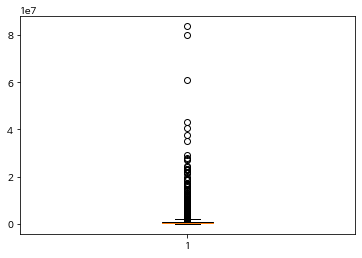

In [66]:
plt.boxplot(df[['channelId', 'view_count']].groupby('channelId').agg(np.mean))

In [19]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [41]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [6]:
trend_total_unique = pd.DataFrame(columns=['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'description',
       'category_name', 'tag_num', 'minute_time', 'open', 'totalview',
       'subscriber', 'time_diff'])

for i in range(len(trend_total['channelId'].unique())):
    trend_total_unique = trend_total_unique.append(trend_total[trend_total['channelId']==trend_total['channelId'].unique()[i]].head(1), ignore_index=True)


In [8]:
df_unique = trend_total_unique

In [27]:
# 채널들 구독자수 분포 확인

df_unique['subscriber'].describe()

count    8.630000e+02
mean     7.349220e+05
std      2.878632e+06
min      2.620000e+02
25%      7.505000e+04
50%      1.900000e+05
75%      4.585000e+05
max      5.210000e+07
Name: subscriber, dtype: float64

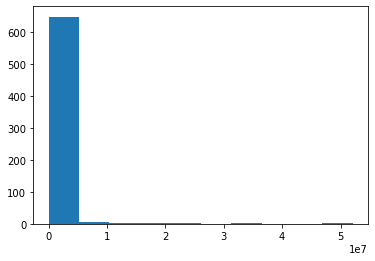

In [10]:
# Entertainment를 제한 카테고리들의 채널 구독자수
plt.hist(df_unique['subscriber'][df_unique['category_name']!='Entertainment'])
plt.show()

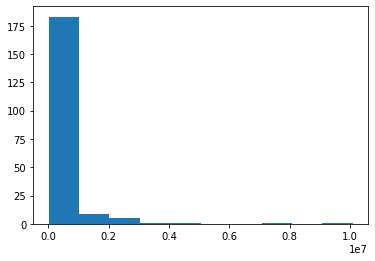

In [11]:
# Entertainment 카테고리의 채널 구독자수
plt.hist(df_unique['subscriber'][df_unique['category_name']=='Entertainment'])
plt.show()

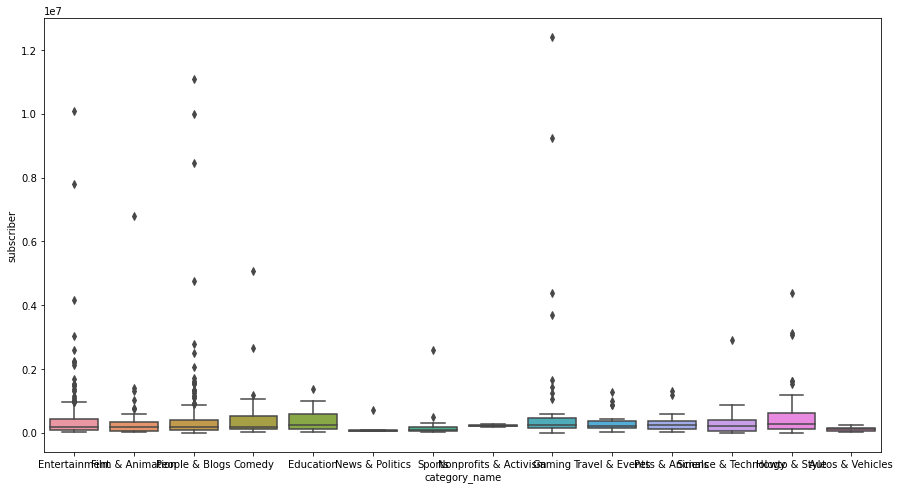

In [33]:
# 카테고리별 채널들의 구독자수 분포 (boxplot)
plt.figure(figsize = (15, 8))
sns.boxplot(data = df_unique[['subscriber', 'category_name']][df_unique['category_name']!='Music'], x='category_name', y = 'subscriber')

plt.show()

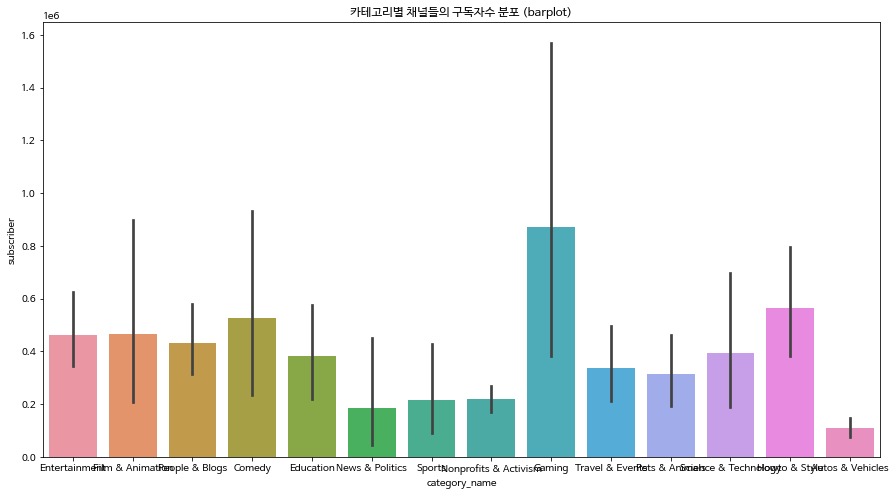

In [42]:
# 카테고리별 채널들의 구독자수 분포 (barplot)
plt.figure(figsize = (15, 8))
sns.barplot(data = df_unique[['subscriber', 'category_name']][df_unique['category_name']!='Music'], x='category_name', y = 'subscriber')
plt.title("카테고리별 채널들의 구독자수 분포 (barplot)")
plt.show()

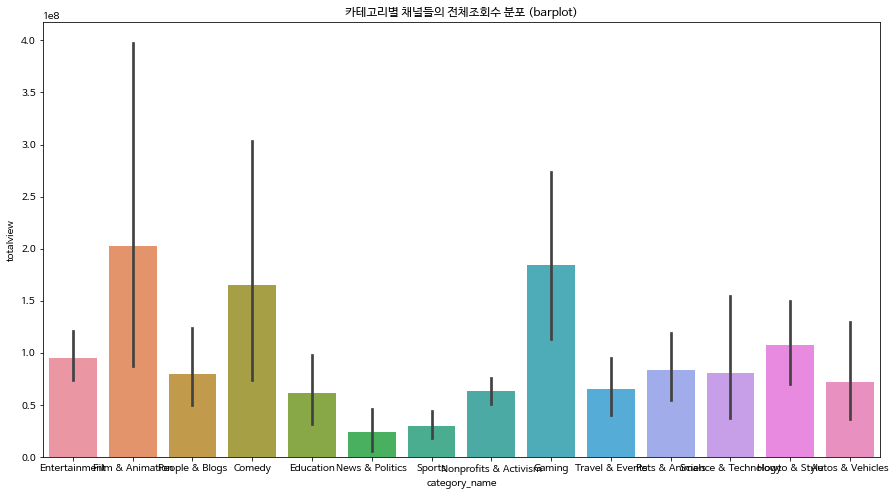

In [44]:
# 카테고리별 채널들의 전체 조회수 분포 (barplot)
plt.figure(figsize = (15, 8))
sns.barplot(data = df_unique[['totalview', 'category_name']][df_unique['category_name']!='Music'], x='category_name', y = 'totalview')
plt.title("카테고리별 채널들의 전체조회수 분포 (barplot)")
plt.show()

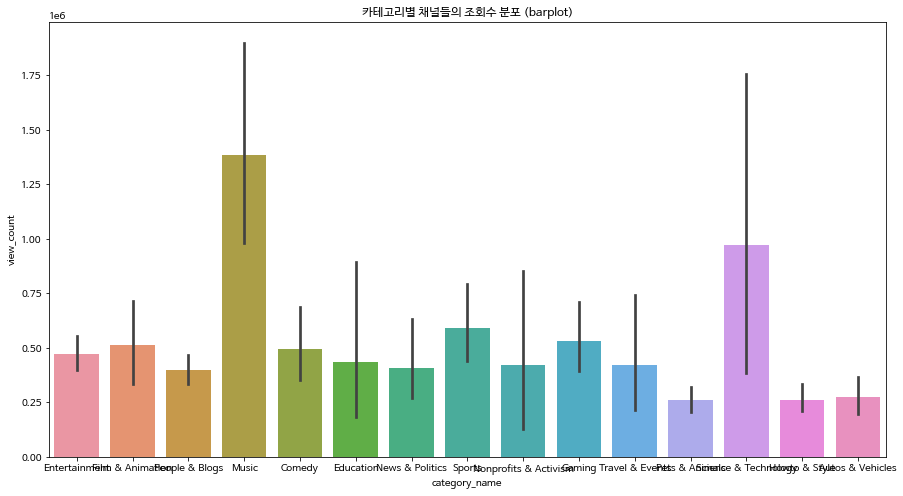

In [45]:
# 카테고리별 채널들의 전체 조회수 분포 (barplot)
plt.figure(figsize = (15, 8))
sns.barplot(data = df_unique[['view_count', 'category_name']], x='category_name', y = 'view_count')
plt.title("카테고리별 채널들의 조회수 분포 (barplot)")
plt.show()